# Machine Learning Project

Nama    : Evanza Kevin Abisha

NIM     : A11.2022.14671

Judul   : Analisis Kesehatan Tidur Menggunakan Metode Random Forest

## Isi Laporan

1. [Ringkasan](#Ringkasan)

2. [Permasalahan](#Permasalahan)

3. [Tujuan](#Tujua)

4. [Model](#Model)

5. [Proses & Modelling](#Proses)

7. [Kesimpulan](#Kesimpulan)


## Ringkasan

[ Kembali](#Isi-Laporan)

Proyek ini membahas tentang penelitian kesehatan tidur seseorang, di mana dengan menggunakan data seperti umur, pekerjaan, durasi tidur, dan gender. kita dapat memprediksi kesehatan tidur seseorang dengan lebih akurat dan komprehensif. Dalam proyek ini, kita menerapkan metode Random Forest untuk memprediksi kualitas tidur seseorang, karena metode ini mampu menangani data dengan berbagai variabel dan menghasilkan model yang lebih kuat dan tahan terhadap overfitting, sehingga memberikan prediksi yang lebih andal dan dapat diandalkan untuk pengambilan keputusan yang lebih baik terkait dengan intervensi dan rekomendasi peningkatan kualitas tidur.

## Permasalahan

[ Kembali](#Isi-Laporan)

Permasalahan yang dihadapi dalam penelitian ini adalah variabilitas faktor-faktor yang mempengaruhi kesehatan tidur, seperti umur, pekerjaan, durasi tidur, dan gender, yang memerlukan identifikasi dan analisis mendalam untuk memahami pengaruh masing-masing faktor tersebut terhadap kualitas tidur seseorang, serta tantangan dalam membuat prediksi yang akurat menggunakan metode Random Forest agar dapat menghasilkan model yang andal dan efektif untuk memberikan rekomendasi peningkatan kualitas tidur yang lebih baik.

## Tujuan

[ Kembali ](#Isi-Laporan)

1. Menganalisis data tidur tiap individu
2. Mengembangkan metode Random Forest untuk memprediksi kesehatan tidur seseorang
3. Mengenditifikasi faktor-faktor resiko terkait masalah tidur seseorang
4. Mengukur akurasi dengan menggunakan metode Random Forest

<img src= "Bagan.png" style="width:350px;height:250px;text-align:center" />


## Proses & Modelling

[ Kembali ](#Isi-Laporan)

Mengimport Library

In [198]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

Mengimport Dataset

In [199]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Menampilkan Informasi DataFrame

In [200]:
df = df.drop(columns='Person ID')

df['Blood Pressure'] = df['Blood Pressure'].replace({'/':'.'}, regex=True).astype('float')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    float64
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 35.2+ KB


Menampilkan Ringkasan Statistik

In [201]:
df.describe()


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,129.399973,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,7.808076,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,115.750000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,125.800000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,130.850000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,135.900000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,142.920000,86.000000,10000.000000


In [202]:
df.isnull().sum()


Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

Melihat berapa banyak Colomn

In [203]:
cat_col = df.select_dtypes('object')

print('There is a total of ',cat_col.shape[1],'categorical columns')

There is a total of  4 categorical columns


In [204]:
num_col = df.select_dtypes('number')

print('There is a total of ',num_col.shape[1],'categorical columns')

There is a total of  8 categorical columns


Melihat Distribusi Frekuensi Variabel Kategori

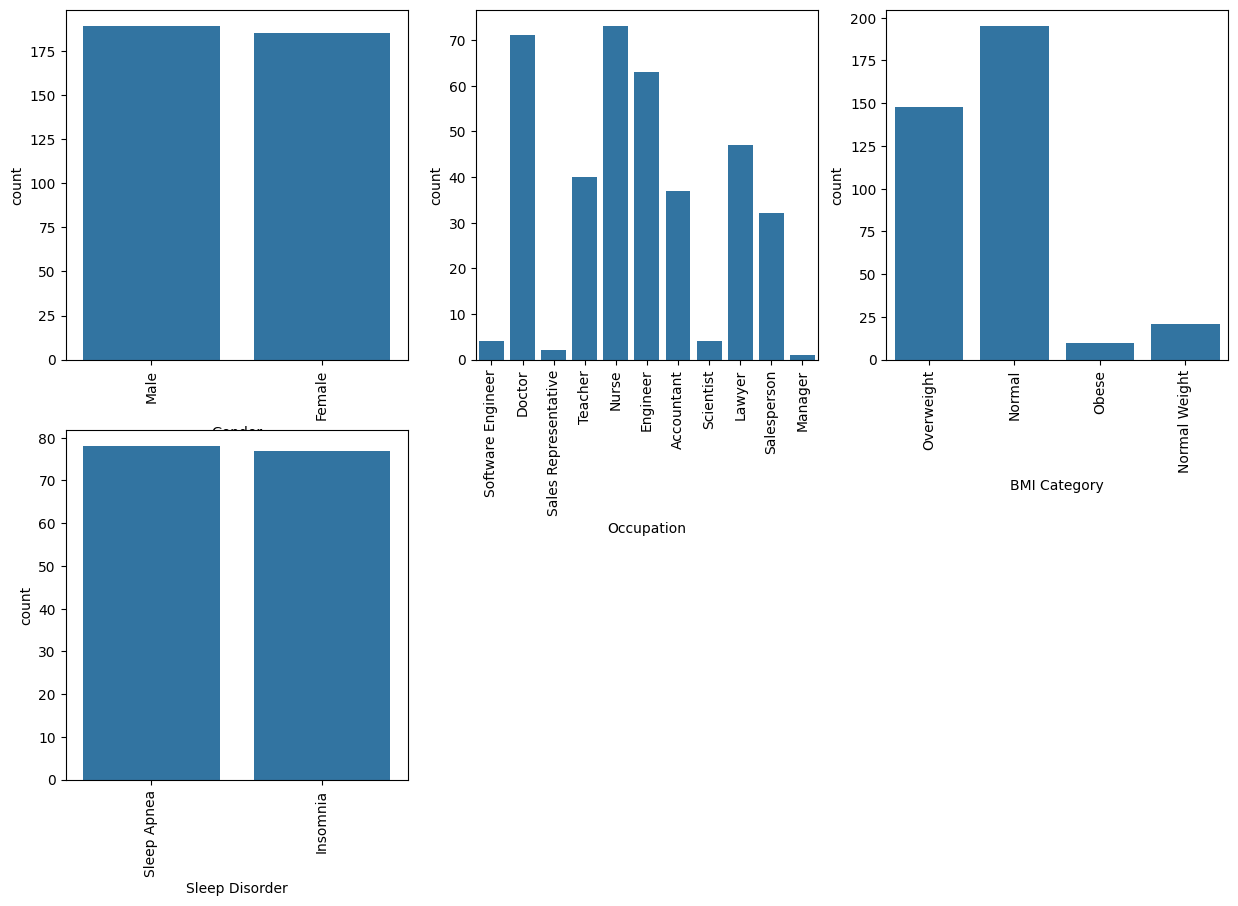

In [205]:
fig = plt.figure(figsize=(15, 10))

for i, var in enumerate(cat_col):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=var, data=cat_col)
    plt.xticks(rotation=90)

plt.show()

Mengelompokkan Kategori Data

In [206]:
df['BMI Category'] = df['BMI Category'].replace({'Obese':'Overweight','Normal Weight':'Normal'})
df['BMI Category'].value_counts()

BMI Category
Normal        216
Overweight    158
Name: count, dtype: int64

Membuat Variabel Numerik 

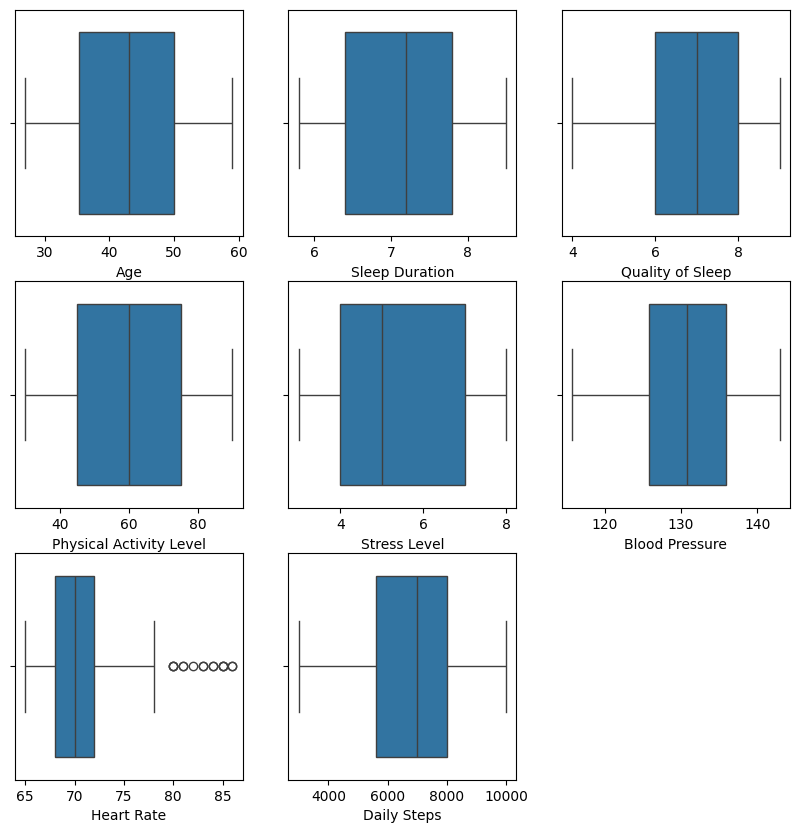

In [207]:
fig = plt.figure(figsize=(10, 10))

for i, var in enumerate(num_col):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=var, data=num_col)
    plt.xticks(rotation=0)

plt.show()

Membuat Visualisasi Peta

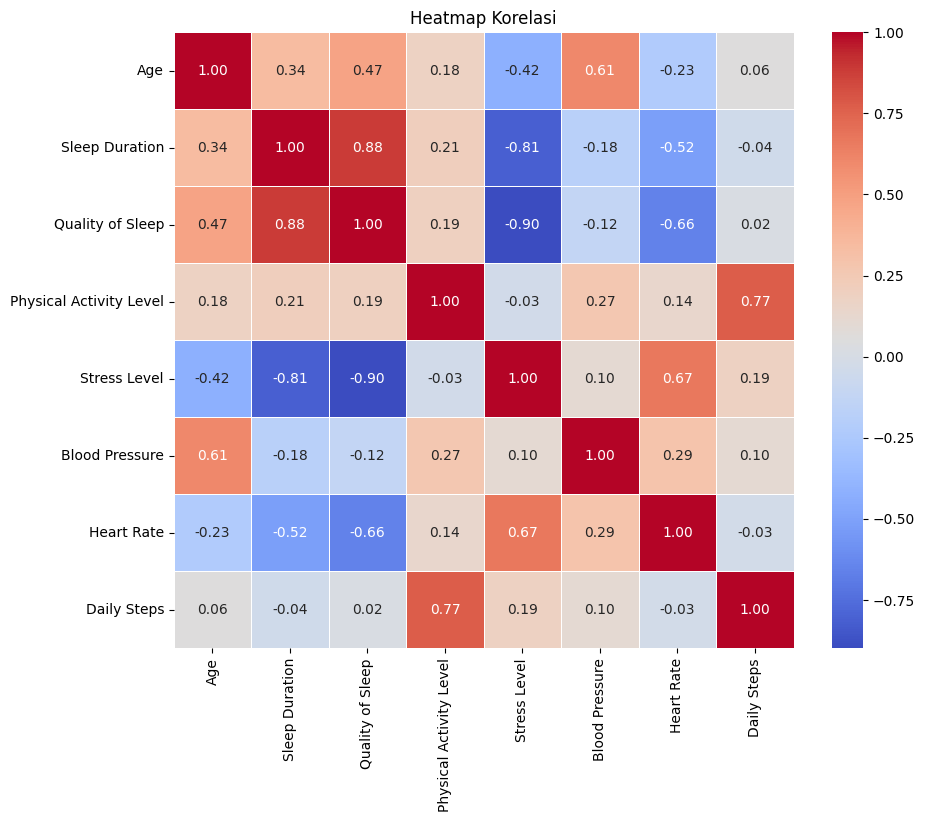

In [208]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(data=numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

Memilih target dengan menunjukkan sleep disorder berdasarkan gender

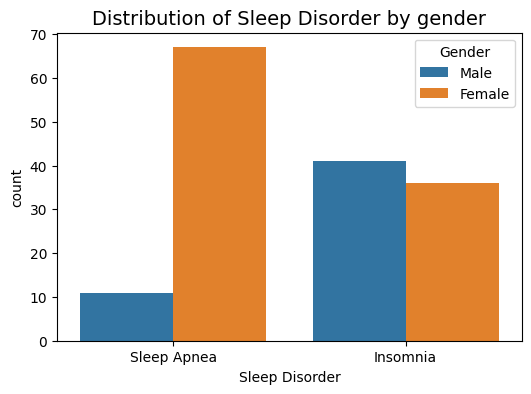

In [209]:
TARGET = 'Sleep Disorder'

df[TARGET].value_counts()

plt.figure(figsize=(6, 4))
sns.countplot(data=df, hue='Gender', x=TARGET)
plt.title('Distribution of Sleep Disorder by gender', fontsize=14)
plt.show()

Menunjukkan Sleep Discorder Berdasarkan Umur

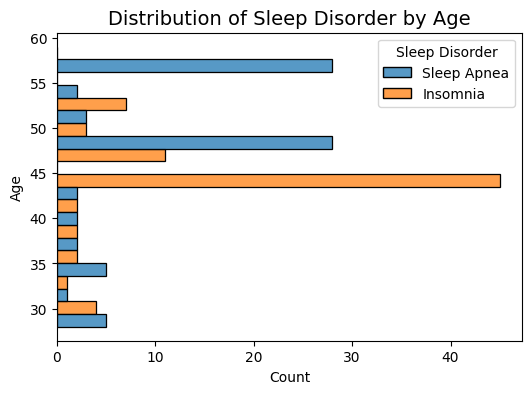

In [210]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, hue=TARGET, y='Age',
             multiple = "dodge")
plt.title('Distribution of Sleep Disorder by Age', fontsize=14)
plt.show()

Menampilkan Sleep Discorder Berdasarkan Pekerjaan

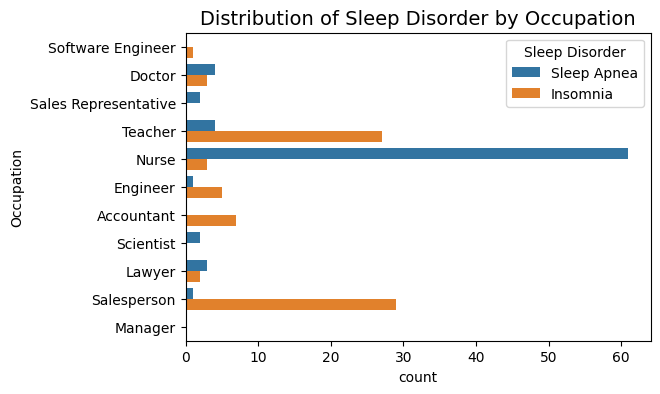

In [211]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, hue=TARGET, y='Occupation')
plt.title('Distribution of Sleep Disorder by Occupation', fontsize=14)
plt.show()

Memproses Kategori Variabel

In [214]:
df.columns
df.select_dtypes('object').head(2)
label_encoder = preprocessing.LabelEncoder()
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['BMI Category'] = label_encoder.fit_transform(df['BMI Category'])
df['Sleep Disorder'] = label_encoder.fit_transform(df['Sleep Disorder'])

Menguji Dengan Membagi 2 Bagian

In [215]:
X = df.drop(columns=TARGET)
y = df[TARGET]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train

192    0
75     2
84     2
362    1
16     1
      ..
71     2
106    2
270    1
348    1
102    2
Name: Sleep Disorder, Length: 299, dtype: int64

Tahap Pengujian Menggunakan Random Forest

In [216]:
scaler = StandardScaler()
rf = RandomForestClassifier(
            n_estimators = 100,
            criterion    = 'gini',
            max_depth    = None,
            max_features = 'auto',
            oob_score    = False,
            n_jobs       = -1,
            random_state = 123
         )
random_forest = Pipeline(steps=[
    ('scaler', scaler),
    ('model', rf)
])
random_forest = RandomForestClassifier(max_features='sqrt')

random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

print('The model gives', accuracy_score(y_test, y_pred), 'accuracy on y_test')


The model gives 0.88 accuracy on y_test


Menampilkan Prediksi Y & X

In [217]:
y_train.value_counts()
y_test_pred = pd.DataFrame(random_forest.predict(X_test), index=y_test.index, columns=[TARGET])
results_df = y_test_pred.join(y_test, lsuffix='_Prediction', rsuffix='_y_test', how='inner')

results_df.head(30)


,Sleep Disorder_Prediction,Sleep Disorder_y_test
329,2,2
33,2,2
15,2,2
325,2,2
57,2,2
239,0,0
76,2,2
119,2,2
332,2,2
126,2,2


Melihat Fitur Penting

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')
Kolom 'columns' tidak ditemukan dalam DataFrame.
The model gives 0.88 accuracy on y_test


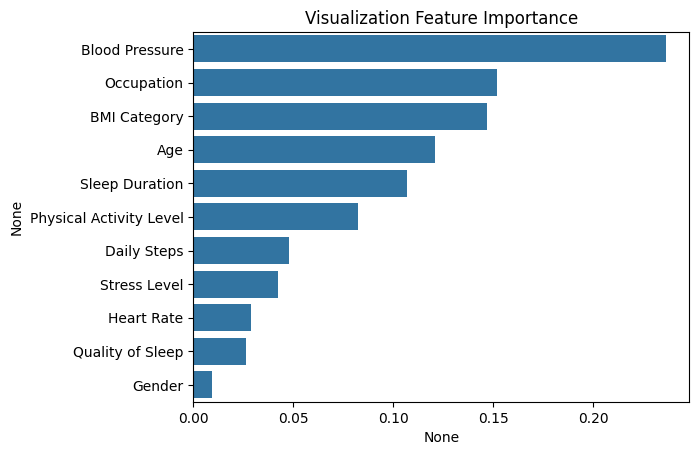

In [218]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Misalkan df adalah DataFrame yang memuat data Anda
# Memeriksa kolom dalam DataFrame
print(df.columns)

# Memastikan nama kolom target benar
target_column = 'columns'  # Ganti dengan nama kolom target yang benar

# Memisahkan fitur dan target
if target_column in df.columns:
    X = df.drop(columns=[target_column])
    y = df[target_column]
else:
    print(f"Kolom '{target_column}' tidak ditemukan dalam DataFrame.")

# Memisahkan data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model RandomForestClassifier dengan parameter yang valid
random_forest = RandomForestClassifier(max_features='sqrt')

# Melatih model
random_forest.fit(X_train, y_train)

# Memprediksi dengan model yang telah dilatih
y_pred = random_forest.predict(X_test)

# Menampilkan akurasi model pada y_test
print('The model gives', accuracy_score(y_test, y_pred), 'accuracy on y_test')

# Menghitung feature importances
feature_importances = random_forest.feature_importances_

# Membuat Series dari feature importances untuk memudahkan plotting
feature_score = pd.Series(feature_importances, index=X_train.columns).sort_values(ascending=False)

# Plotting feature importances
sns.barplot(x=feature_score, y=feature_score.index)
plt.title('Visualization Feature Importance')
plt.show()


Menampilkan Hasil F1

In [219]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.85      0.69      0.76        16
           2       0.95      0.98      0.97        43

    accuracy                           0.88        75
   macro avg       0.84      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75



## Kesimpulan

[ Kembali ](#Isi-Laporan)



## Anailisis Data Eksploratif (EDA)


Faktor-faktor seperti usia, jenis kelamin, dan pekerjaan terlihat memiliki pengaruh signifikan terhadap kesehatan tidur.


Jumlah penderita Sleep Apnea dan Insomnia tidak terlalu beda.
Penderita Sleep Apnea kebanyakan berprofesi sebagai nurse sedangkan Insomnia sebagai teacher dan sales.

## Model Random Forest

Model ini memiliki tingkat akurasi sebesar 88% dalam memprediksi kesehatan tidur berdasarkan variabel input.

Model ini juga memiliki nilai F1-score yang baik, menunjukkan keseimbangan antara precision dan recall.

Fitur paling penting yang mempengaruhi prediksi kualitas tidur adalah BMI Category, Blood Presure, dan Sleep Duration. Fitur-fitur ini memiliki pengaruh terbesar dalam model.